This demo shows that the errorbars are underestimated by a factor of 3, on average

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-0.525509606298 2.88909102256


/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


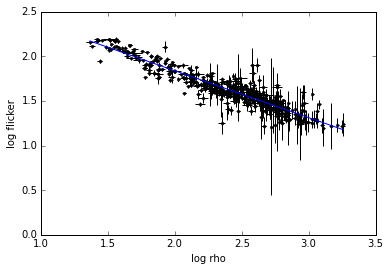

In [31]:
# load data
f, ferr, r, rerr = np.genfromtxt("../data/flickers.dat").T

# fit a line
C = np.diag(ferr)
AT = np.vstack((r, np.ones_like(r)))
ATA = np.dot(AT, AT.T)
m, c = np.linalg.solve(ATA, np.dot(AT, f))
print(m, c)

# plot data
xs = np.linspace(min(r), max(r), 100)
ys = m * xs + c
plt.errorbar(r, f, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)
plt.plot(xs, ys)
plt.ylabel("log flicker")
plt.xlabel("log rho")

Divide out model

<Container object of 3 artists>

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


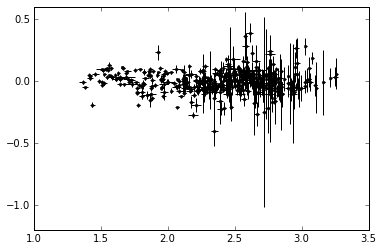

In [32]:
resids = f - (m * r + c)
plt.errorbar(r, resids, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)

0.0823686643488
2.97468287435


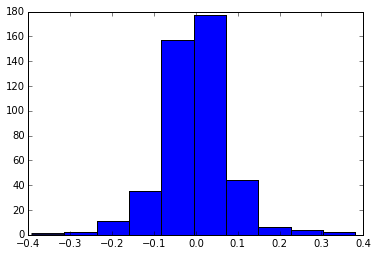

In [46]:
plt.hist(resids)
print(np.std(resids))
print(np.std(resids/ferr))

In [37]:
# load data
f, ferr, l, lerr, _, _ = np.genfromtxt("../data/log.dat").T

-0.826618949099 4.90659568177


/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


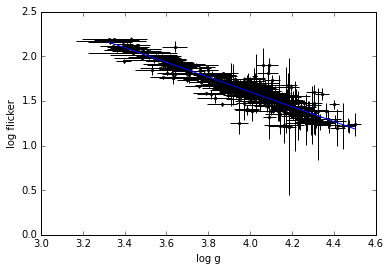

In [40]:
# fit a line
C = np.diag(ferr)
AT = np.vstack((l, np.ones_like(l)))
ATA = np.dot(AT, AT.T)
m, c = np.linalg.solve(ATA, np.dot(AT, f))
print(m, c)

# plot data
xs = np.linspace(min(l), max(l), 100)
ys = m * xs + c
plt.errorbar(l, f, xerr=lerr, yerr=ferr, fmt="k.", capsize=0)
plt.plot(xs, ys)
plt.ylabel("log flicker")
plt.xlabel("log g")

<Container object of 3 artists>

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


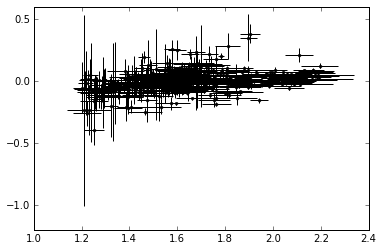

In [42]:
resids = f - (m * l + c)
plt.errorbar(f, resids, xerr=lerr, yerr=ferr, fmt="k.", capsize=0)

0.0823686643488
errorbars underestimated by a factor of 2.97468287435


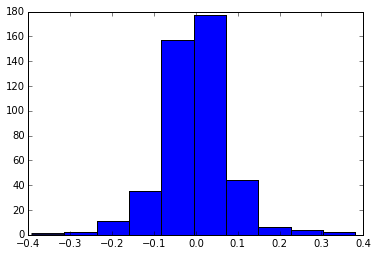

In [45]:
plt.hist(resids)
print(np.std(resids))
print("errorbars underestimated by a factor of", np.std(resids/ferr))